#**1) PRE-PROCESSING**

---


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import string

# Graphics Libs
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 18, 8
import seaborn as sns

# nlp libraries
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
DATA_PATH = 'datasets/dankmemes_task2_train.csv'
data = pd.read_csv(DATA_PATH)
data.head()

,File,Engagement,Manipulation,Visual,Text,Hate Speech
0,1000.jpg,381,0,0,quando ti chiedono se sia peggiore fratelli d'...,1
1,1001.jpg,142,1,0,conte entra in un negozio di telefonia e passa...,0
2,1002.jpg,3598,1,"Di Maio, Zingaretti, Berlusconi, Salvini",i politicanti italici non vedono l'ora di anda...,1
3,1003.jpg,165,1,"Salvini, Renzi",sono scemo. io di più. scemo & più scemo,1
4,1004.jpg,44,0,0,"beppe grillo (2017) genova, 21 luglio 1948 pol...",0


In [4]:
data.describe()

,Engagement,Manipulation,Hate Speech
count,800.000000,800.000000,800.000000
mean,587.813750,0.370000,0.493750
std,2298.689127,0.483106,0.500274
min,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000
50%,57.000000,0.000000,0.000000
75%,228.250000,1.000000,1.000000
max,38994.000000,1.000000,1.000000


In [5]:
data.dtypes

File            object
Engagement       int64
Manipulation     int64
Visual          object
Text            object
Hate Speech      int64
dtype: object

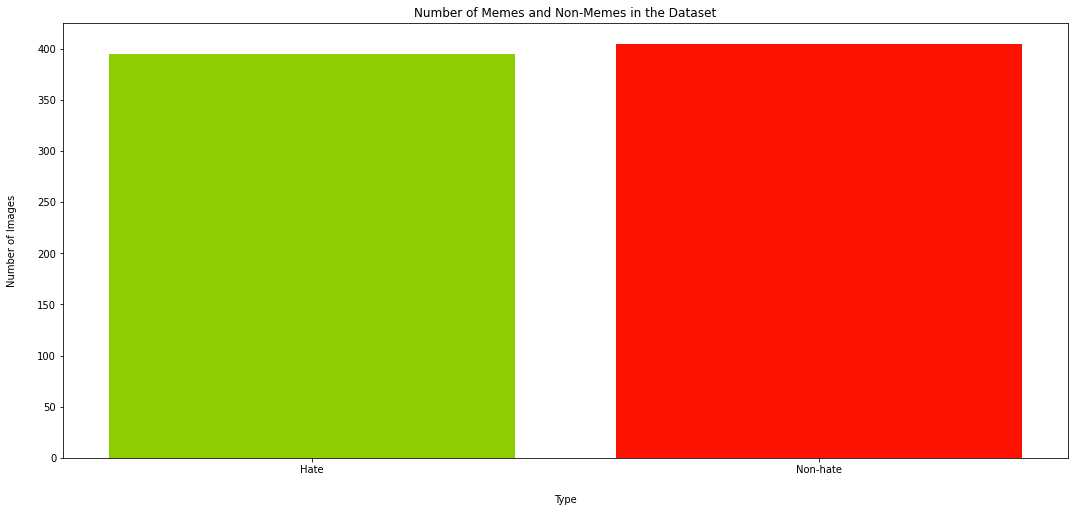

In [7]:
# Count the number of memes and non-memes
number_of_memes = data['Hate Speech'].sum()
number_of_non_memes = len(data) - number_of_memes



# Create the bar plot
plt.bar(['Hate', 'Non-hate'], [number_of_memes, number_of_non_memes], color=['#8fce00', '#ff1100'])

# Set labels and title
plt.xlabel('Type', labelpad=20)
plt.ylabel('Number of Images', labelpad=20)
plt.title('Number of Memes and Non-Memes in the Dataset')

# Show the plot
plt.show()

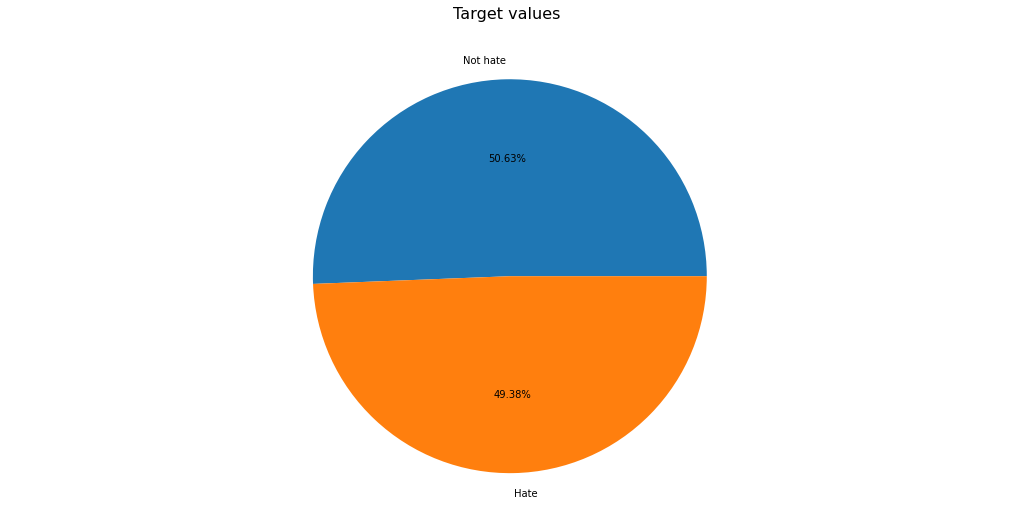

In [9]:
count = data['Hate Speech'].value_counts()
labels = ['Not hate', 'Hate']

plt.pie(count, 
        labels=labels,
        autopct = '%1.2f%%')
plt.axis('equal') # center the plot
plt.title('Target values \n\n', fontsize = 16)
plt.show()

In [11]:
data["N_words_text"] = data['Text'].apply(lambda x:len(str(x).split()))
data.head()

,File,Engagement,Manipulation,Visual,Text,Hate Speech,N_words_text
0,1000.jpg,381,0,0,quando ti chiedono se sia peggiore fratelli d'...,1,15
1,1001.jpg,142,1,0,conte entra in un negozio di telefonia e passa...,0,14
2,1002.jpg,3598,1,"Di Maio, Zingaretti, Berlusconi, Salvini",i politicanti italici non vedono l'ora di anda...,1,17
3,1003.jpg,165,1,"Salvini, Renzi",sono scemo. io di più. scemo & più scemo,1,9
4,1004.jpg,44,0,0,"beppe grillo (2017) genova, 21 luglio 1948 pol...",0,26


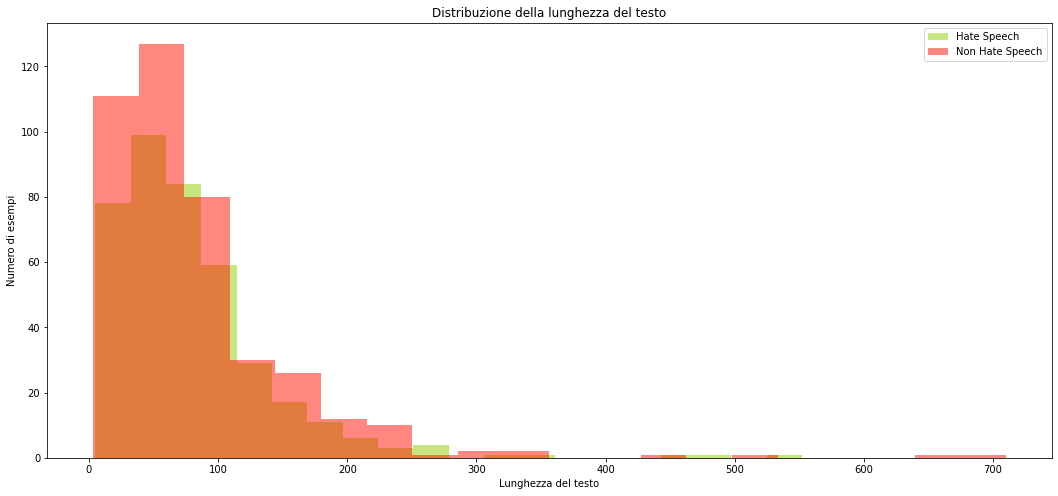

In [14]:
# Visualizzo la lunghezza del testo dei meme e delle immagini che non sono meme
# Filtra il dataset per i valori con meme = 1
meme_dataset = data[data['Hate Speech'] == 1]
non_meme_dataset = data[data['Hate Speech'] == 0]

# Calcola la lunghezza del testo per i valori con meme = 1
meme_dataset['Text_Length'] = meme_dataset['Text'].apply(len)
non_meme_dataset['Text_Length'] = non_meme_dataset['Text'].apply(len)

# Crea il plot della lunghezza del testo per meme e non meme
plt.hist(meme_dataset['Text_Length'], bins=20, alpha=0.5, label='Hate Speech', color='#8fce00')
plt.hist(non_meme_dataset['Text_Length'], bins=20, alpha=0.5, label='Non Hate Speech', color='#ff1100')
plt.xlabel('Lunghezza del testo')
plt.ylabel('Numero di esempi')
plt.title('Distribuzione della lunghezza del testo')
plt.legend()
plt.show()

In [15]:
# Definisci le stopwords italiane
stopwords = nltk.corpus.stopwords.words('italian')

In [16]:
# Rimuovi le stopwords e i segni di punteggiatura dal testo del meme
def preprocess_text(text):
    # Rimuovi la punteggiatura
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenizzazione del testo
    tokens = nltk.word_tokenize(text)
    
    # Rimuovi le stopwords
    tokens = [token for token in tokens if token.lower() not in stopwords]
    
    # Ricomponi il testo senza stopwords
    processed_text = ' '.join(tokens)
    
    return processed_text

In [17]:
data['Processed_Text'] = data['Text'].apply(preprocess_text)
data.head()

,File,Engagement,Manipulation,Visual,Text,Hate Speech,N_words_text,Processed_Text
0,1000.jpg,381,0,0,quando ti chiedono se sia peggiore fratelli d'...,1,15,quando chiedono peggiore fratelli ditalia lega...
1,1001.jpg,142,1,0,conte entra in un negozio di telefonia e passa...,0,14,conte entra negozio telefonia passa pd mantene...
2,1002.jpg,3598,1,"Di Maio, Zingaretti, Berlusconi, Salvini",i politicanti italici non vedono l'ora di anda...,1,17,politicanti italici vedono lora andar urne acc...
3,1003.jpg,165,1,"Salvini, Renzi",sono scemo. io di più. scemo & più scemo,1,9,scemo scemo scemo
4,1004.jpg,44,0,0,"beppe grillo (2017) genova, 21 luglio 1948 pol...",0,26,beppe grillo 2017 genova 21 luglio 1948 politi...


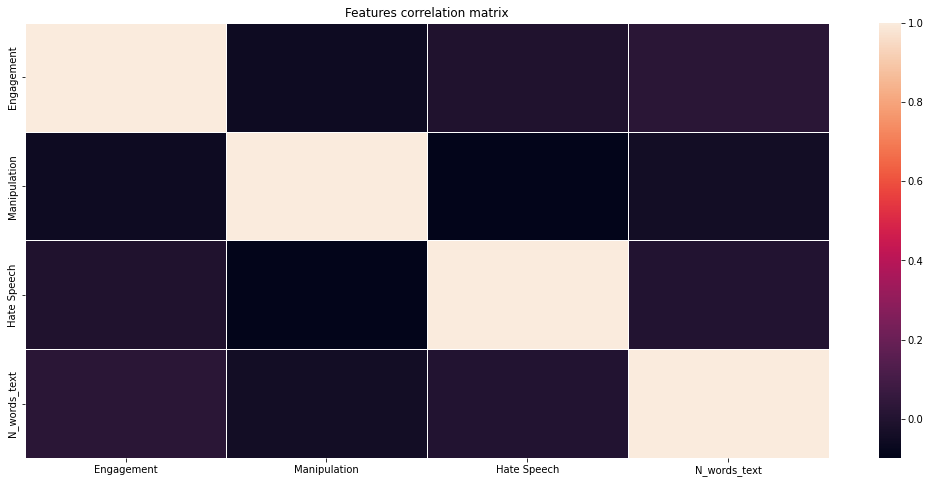

In [18]:
plt.figure()
plt.title("Features correlation matrix")
sns.heatmap(data.corr(), linewidths=.5)
plt.show()